# Linear models in Machine Learning

## Load the needed packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Create a classification dataset and visualize it

Text(0.5,1,'Data')

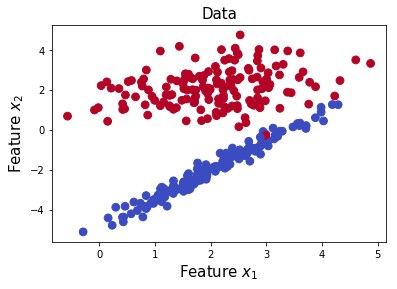

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1,class_sep=2.0,
                           shuffle=True, random_state=0, flip_y=0)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature $x_1$', fontsize=15)
plt.ylabel('Feature $x_2$', fontsize=15)
plt.title("Data", fontsize=15)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       147
          1       0.98      0.98      0.98       153

avg / total       0.98      0.98      0.98       300



Test set accuracy


             precision    recall  f1-score   support

          0       0.96      0.97      0.97       103
          1       0.97      0.96      0.96        97

avg / total       0.97      0.96      0.96       200



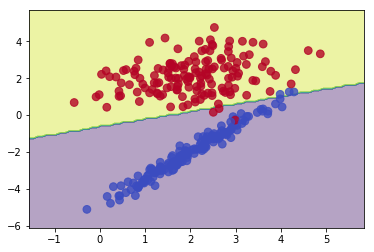

In [3]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)
    print(classification_report(y, model.predict(X)))

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], s=60, c=y, alpha=0.8, cmap=plt.cm.coolwarm)
    return plt, model

_, model = plot_decision_boundaries(X, y, LogisticRegression)
print("\n\nTest set accuracy\n\n")
print(classification_report(y_test, model.predict(X_test)))

## Create another classification dataset and visualize it

Text(0.5,1,'Data')

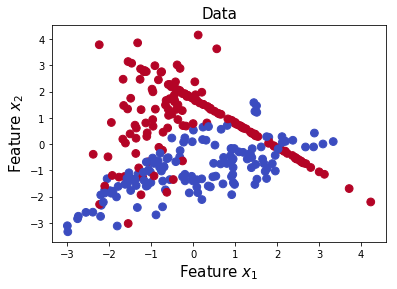

In [4]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,class_sep=0.9,
                           shuffle=True, random_state=0, flip_y=0.0)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature $x_1$', fontsize=15)
plt.ylabel('Feature $x_2$', fontsize=15)
plt.title("Data", fontsize=15)

             precision    recall  f1-score   support

          0       0.73      0.77      0.75       140
          1       0.79      0.76      0.77       160

avg / total       0.76      0.76      0.76       300



Test set accuracy


             precision    recall  f1-score   support

          0       0.90      0.75      0.82       110
          1       0.74      0.90      0.81        90

avg / total       0.83      0.81      0.82       200



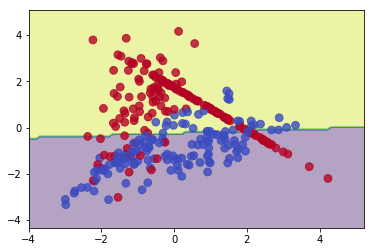

In [5]:
_, model = plot_decision_boundaries(X, y, LogisticRegression)
print("\n\nTest set accuracy\n\n")
print(classification_report(y_test, model.predict(X_test)))